Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за качественную работу, было интересно ее проверять!
- Код написано грамотно, отсутствует дублирования кода, молодец!
- Я оставил некоторые советы надеюсь они будут полезными или интересными.
- Техника бутстрап применилась корректно, было проведено тщательное исследование.
* Отправляю проект назад, чтобы у тебя была возможность задать вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту.


<div class="alert alert-block alert-warning">
<b>Комментарий:</b> Привет! Спасибо за ревью. Свои комментарии и вопросы поместил в желтые блоки.

<div class="alert alert-block alert-success">
<b>Ревьювер[2]:</b> Спасибо за оперативность, приятно видеть фидбек. Рад был быть полезен. Удачи в дальнейшем обучении!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-success">

<b>Успех:</b> Импорты и описание на месте

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

# df0 = pd.read_csv('geo_data_0.csv')
# df1 = pd.read_csv('geo_data_1.csv')
# df2 = pd.read_csv('geo_data_2.csv')

In [3]:
display(df0.head())
df0.info()
print()
display(df1.head())
df1.info()
print()
display(df2.head())
df2.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
print("Количество дубликатов в каждом датасете:",
    df0[['f0', 'f1', 'f2']].duplicated().sum(),
      df1[['f0', 'f1', 'f2']].duplicated().sum(),
      df2[['f0', 'f1', 'f2']].duplicated().sum())

Количество дубликатов в каждом датасете: 0 0 0


In [5]:
df0.drop('id', axis=1, inplace=True)
df1.drop('id', axis=1, inplace=True)
df2.drop('id', axis=1, inplace=True)

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены корректно
    
  
</div>
<div class="alert alert-block alert-info">
<b>Совет </b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) <br> P.S. Пробовать их лучше локально, на платформе будет работать тольео sweetviz, но нужно будет установить пакет самостоятельно


<div class="alert alert-block alert-warning">
<b>Вопрос:</b> Sweetviz установил, но вот как просмотреть отчет? я так понимаю, должно открыться окно в браузере, но этого не происходит.



<div class="alert alert-block alert-info">
    
<b>Ответ[2]:</b> `.show_notebook()`


In [12]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


                                             |          | [  0%]   00:00 -> (? left)


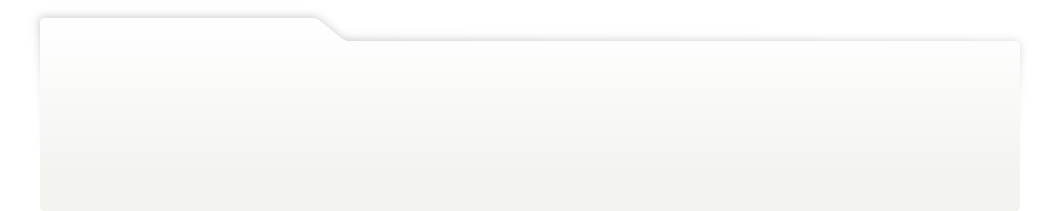
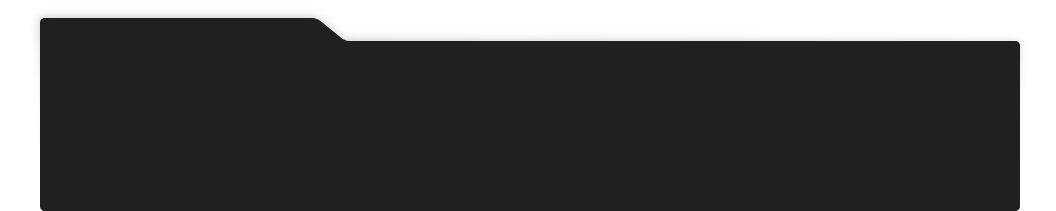
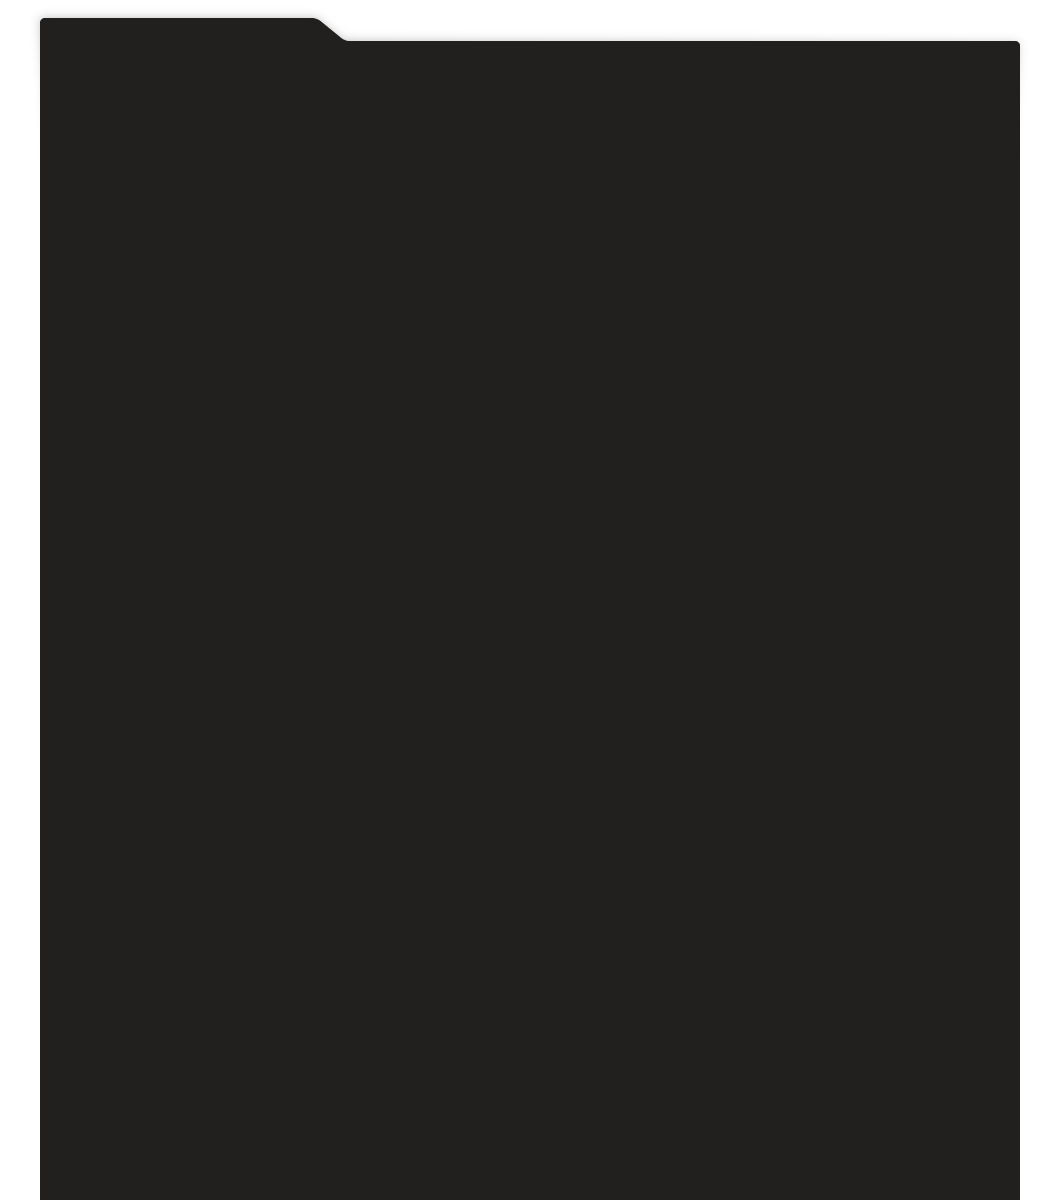
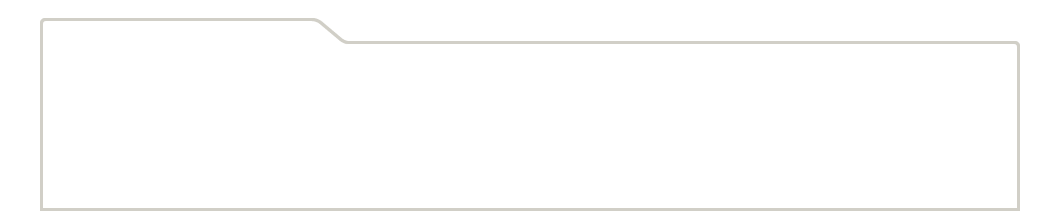
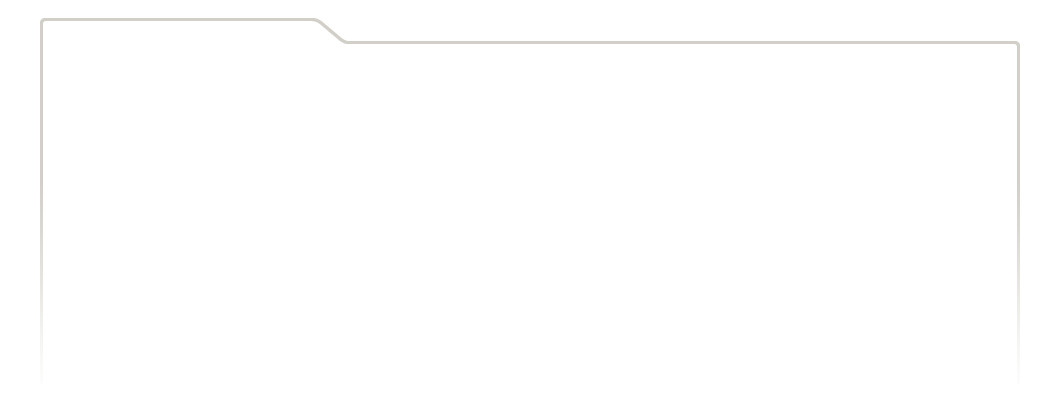
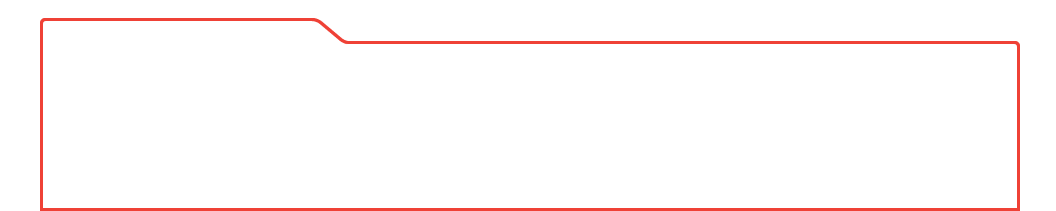
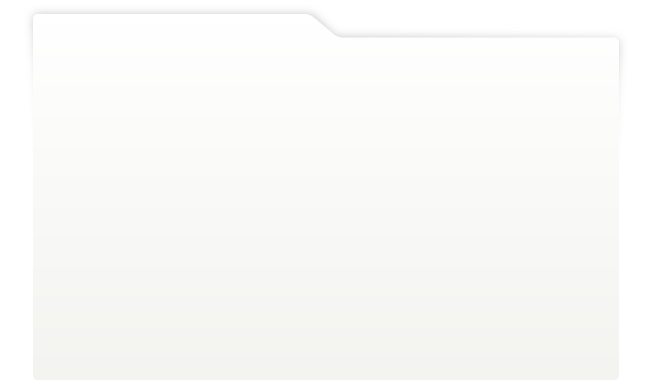
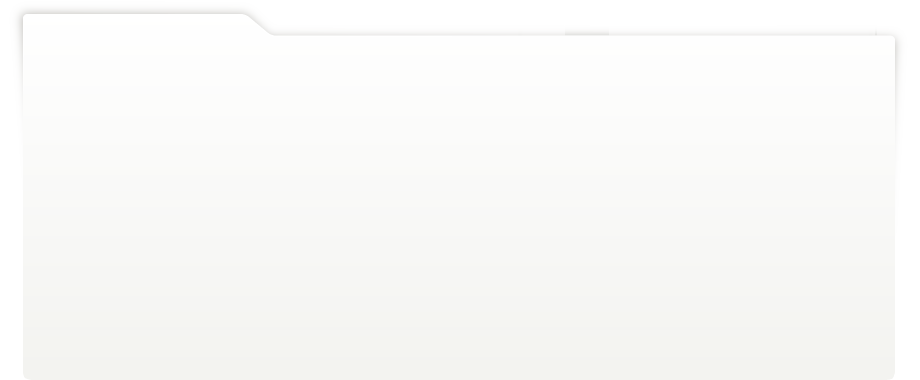
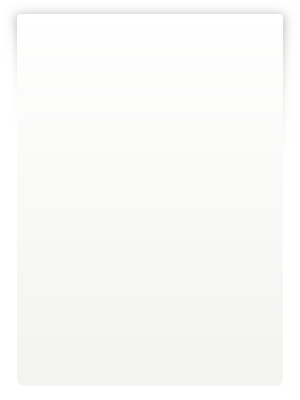
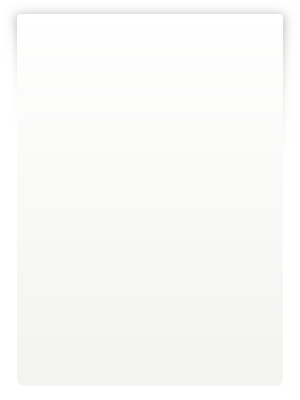
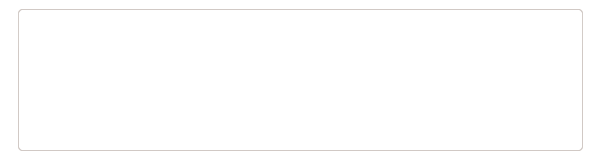
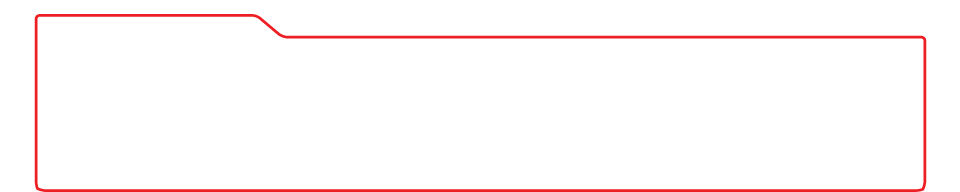
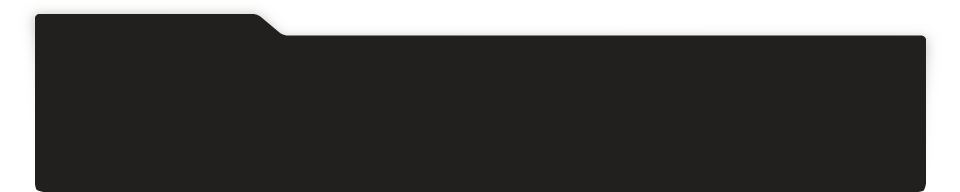
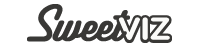
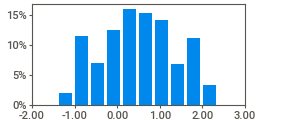
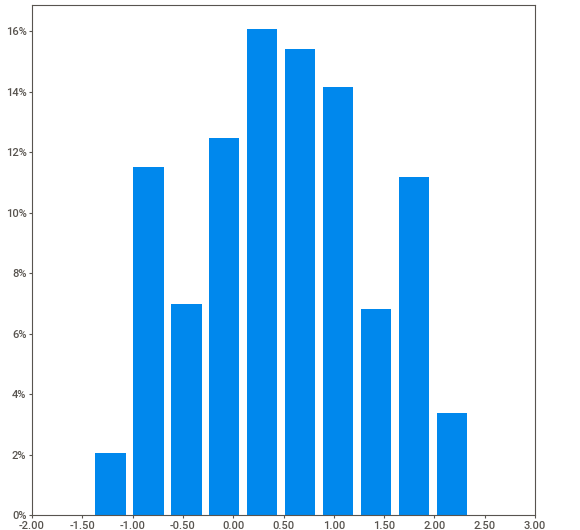
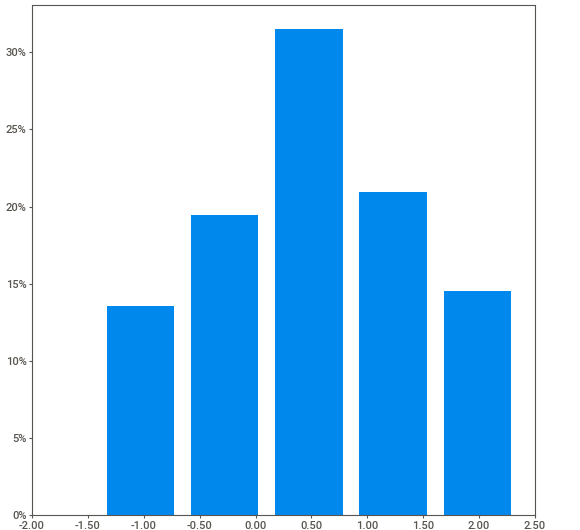
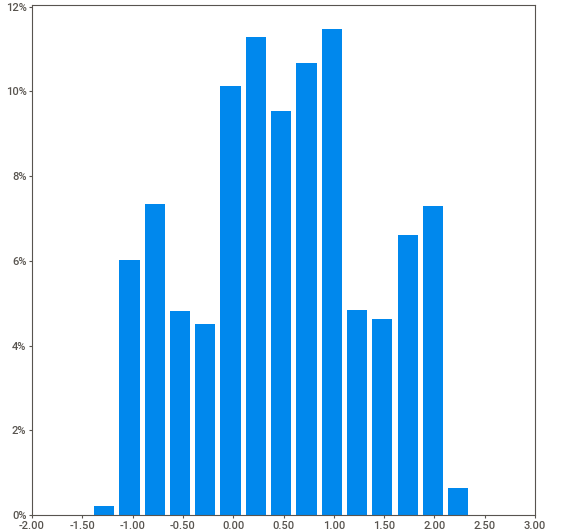
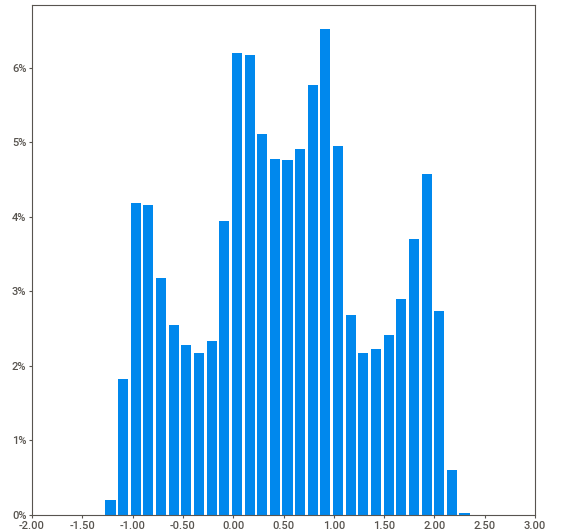
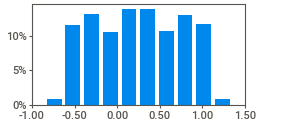
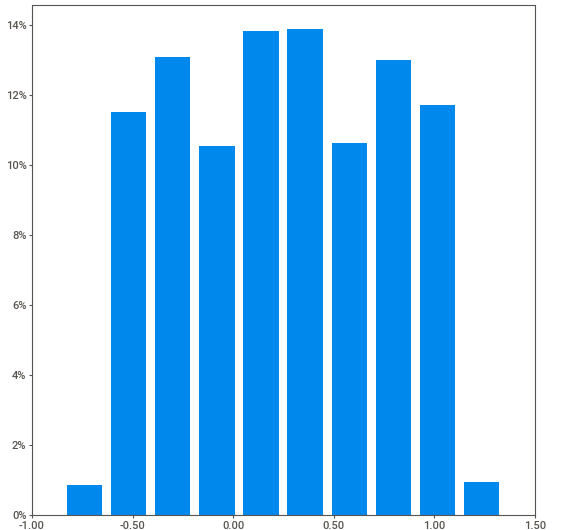
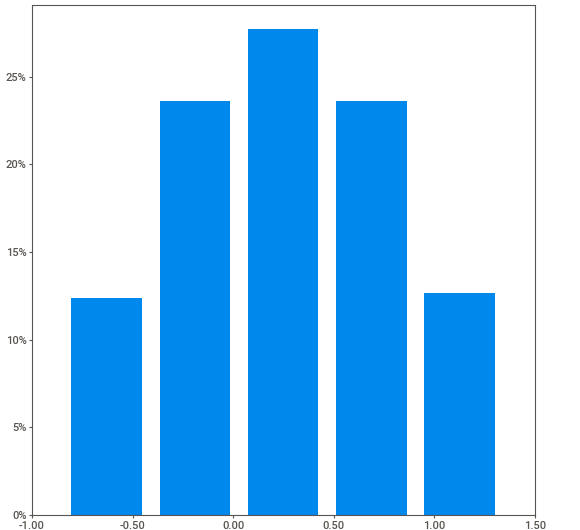
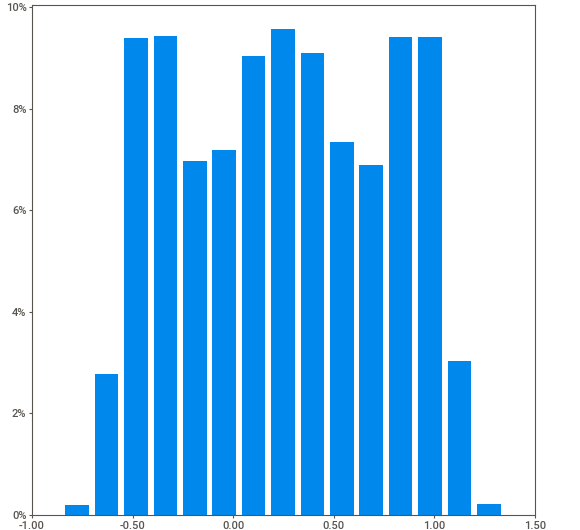
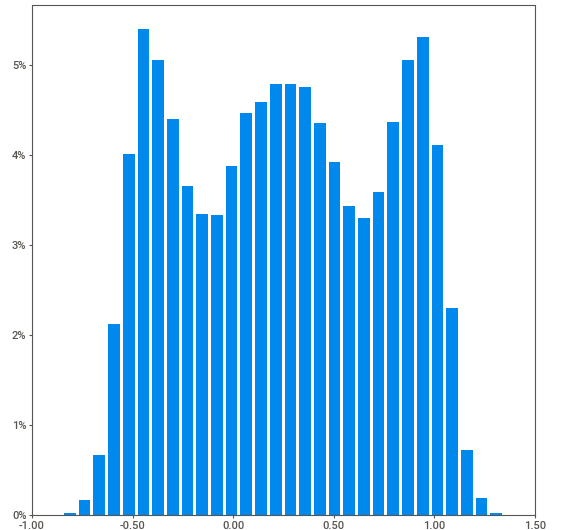
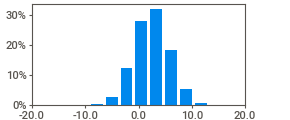
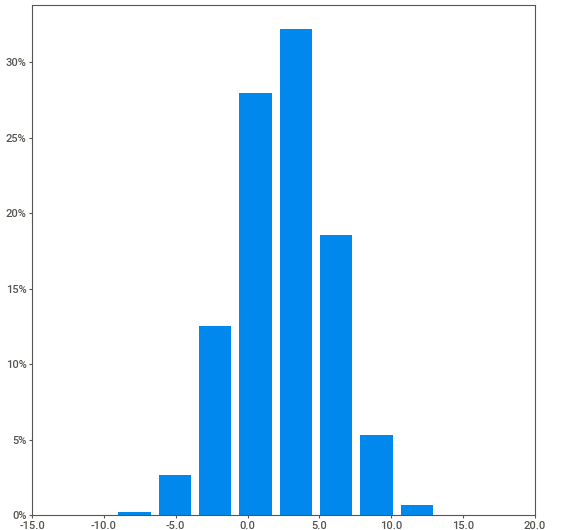
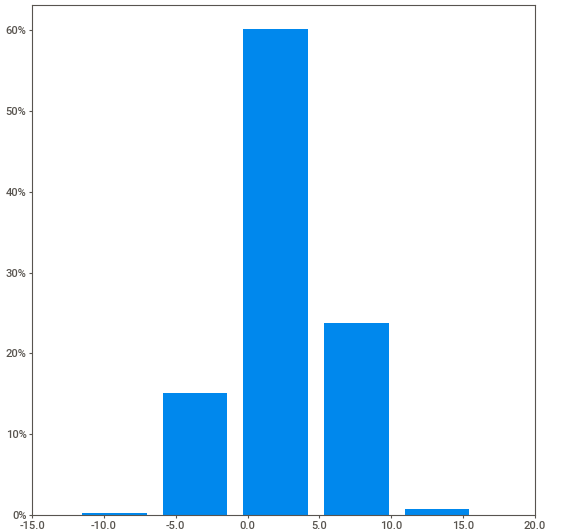
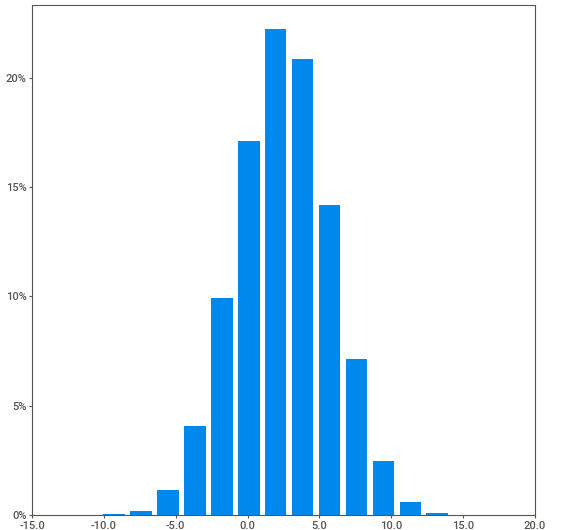
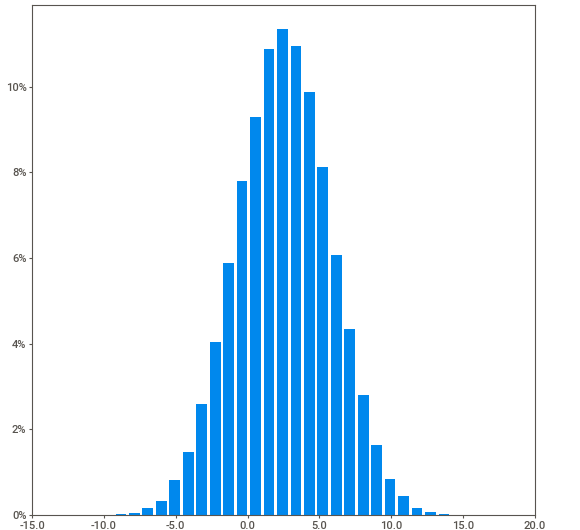
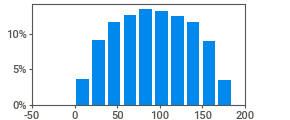
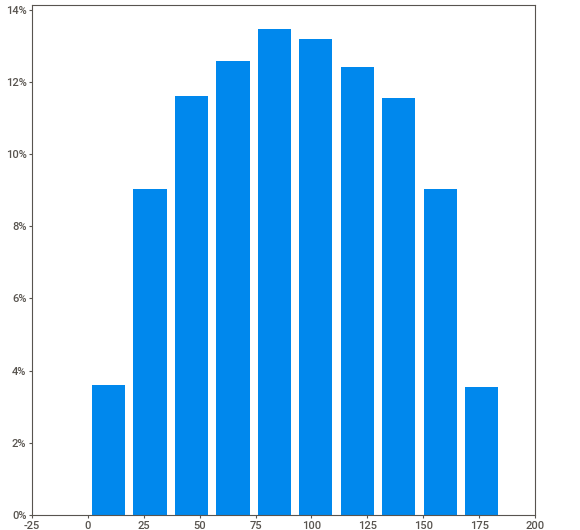
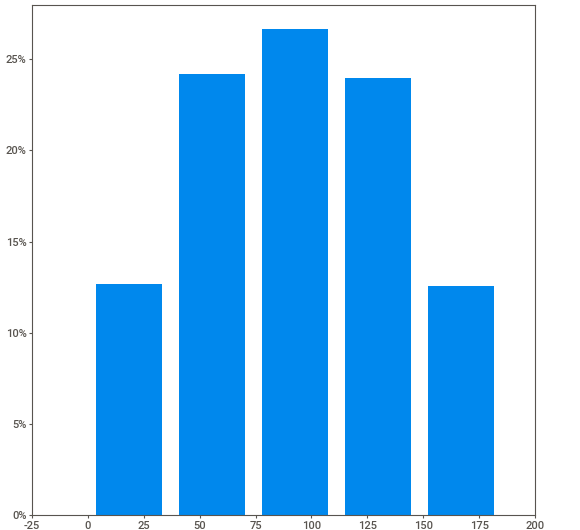
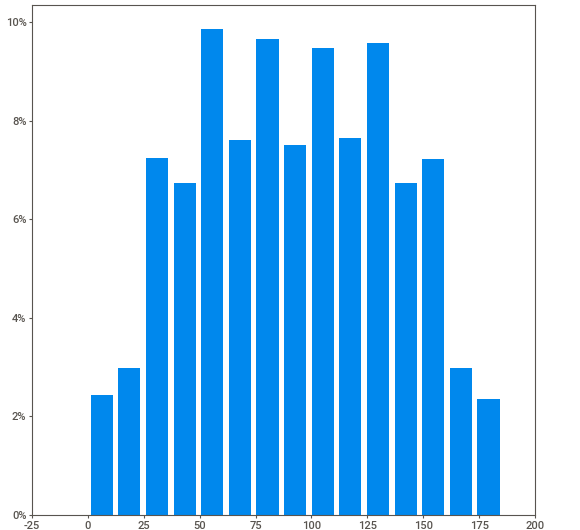
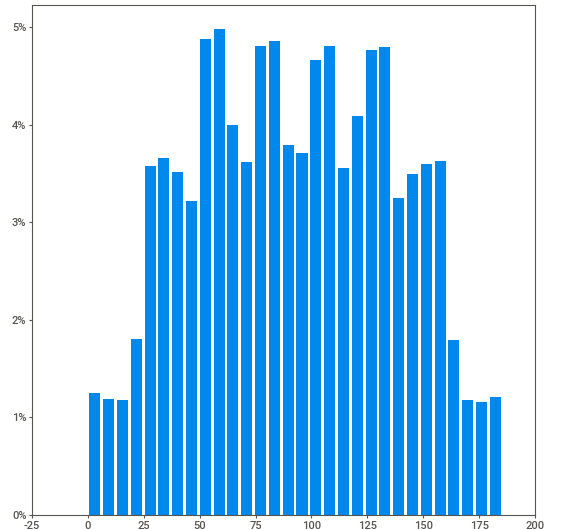
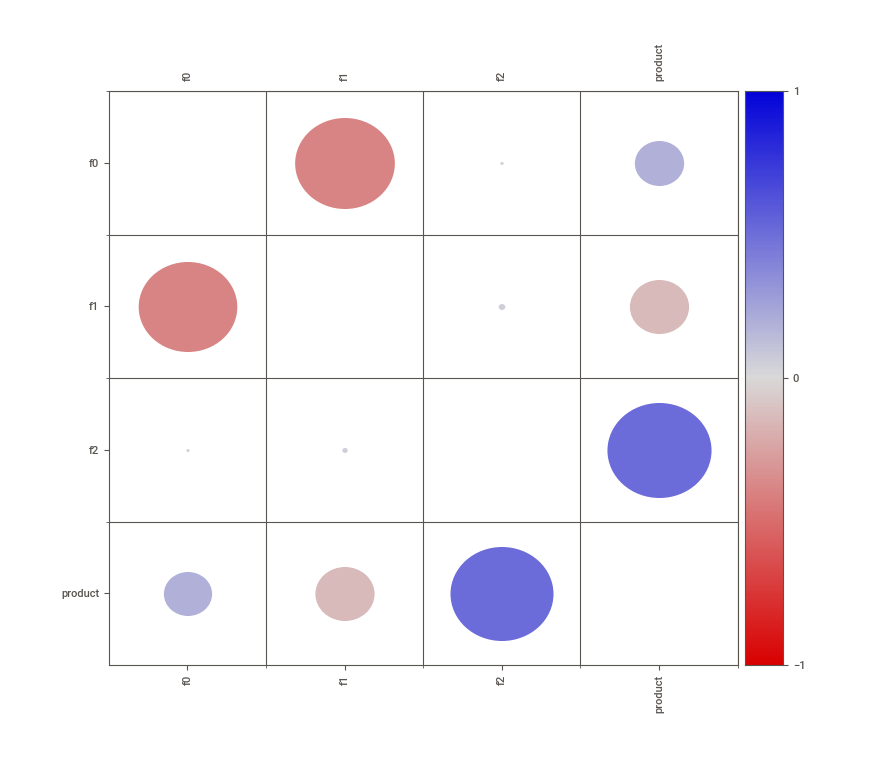
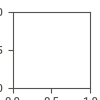

In [13]:
import sweetviz as sv
my_report = sv.analyze(df0)
my_report.show_notebook() 

## Обучение и проверка модели

In [20]:
# функция для автоматизации проверки модели, возвращает словарь со значением RMSE, массивы предсказаний и истинных значений
def check(df):
    # разделяем выборку на обучающую и валидационную
    X_train, X_valid, y_train, y_valid = train_test_split(df.drop(['product'], axis=1), 
                                                      df['product'], 
                                                      test_size=.25, random_state=25)
    model = LinearRegression() 
    model.fit(X_train, y_train) 
    predictions = model.predict(X_valid)
    
    result = {}
    result['RMSE'] = mean_squared_error(y_valid, predictions) ** 0.5
    result['predictions'] = predictions
    result['true'] = y_valid.values
    
    return result

In [21]:
results = [check(d) for d in [df0, df1, df2]]

for i in range(3):
    print (f"RMSE в регионе {i}: {results[i]['RMSE']:.2f}" )

print("\nCредний запас предсказанного сырья")    
for i in range(3):
    mean = np.mean(results[i]['predictions'])
    print (f"в регионе {i}: {mean:.2f}" )

RMSE в регионе 0: 37.65
RMSE в регионе 1: 0.89
RMSE в регионе 2: 40.08

Cредний запас предсказанного сырья
в регионе 0: 92.65
в регионе 1: 69.27
в регионе 2: 94.90


### Вывод
RMSE для модели с предсказаниями для второго региона меньше. Можно предположить, что она работает лучше.

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все нужные метрики посчитаны корректно. 
</div>


## Подготовка к расчёту прибыли

In [22]:
product_price = 450e3
investments = 10e9

budget_per_well = investments / 200
required_product = budget_per_well / product_price

print("Необходимый объём запасов в скважине (тыс. баррелей):", round(required_product, 2))

Необходимый объём запасов в скважине (тыс. баррелей): 111.11



<div class="alert alert-block alert-info">
<b>Совет:</b> Константы принято записывать в верхнем регистре
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> Точно! спасибо!
   

In [23]:
def revenue(predictions, target):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:200]
    return selected.sum() * product_price - investments

<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция прибыли определена верно
    
  
</div>

### Вывод
Необходимый объём запасов в скважине превышает средние запасы по регионам. Однако для регионов 0 и 2 это превышение составляет всего 20%, тогда как для региона 1 - порядка 50%.


<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен
    
  
</div>

## Расчёт прибыли и рисков 

In [25]:
state = np.random.RandomState(25)

for n in range(3):  #цикл по каждому региону
    data = pd.DataFrame.from_dict(data= results[n], orient='columns').drop('RMSE', axis=1)    
    
    # Bootstrap с 1000 выборок
    values = []
    for i in range(1000): 
        target_subsample = data['true'].sample(n=500, replace=True, random_state=state)
        predictions_subsample = data['predictions'][target_subsample.index]
        result = revenue(predictions_subsample, target_subsample)
        values.append(result)

    values = pd.Series(values) / 1e9
    percentage_of_negative = values[values<0].count() / len(values) * 100

    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    print(f"Регион {n}")
    print("Средняя выручка:", round(mean, 2))
    print("Доверительный интервал:", (round(lower, 2), round(upper, 2)))
    print(f"Риск убытков составляет: {percentage_of_negative:.2f} %\n")

Регион 0
Средняя выручка: 0.4
Доверительный интервал: (-0.1, 0.9)
Риск убытков составляет: 5.90 %

Регион 1
Средняя выручка: 0.55
Доверительный интервал: (0.14, 0.99)
Риск убытков составляет: 0.10 %

Регион 2
Средняя выручка: 0.37
Доверительный интервал: (-0.17, 0.91)
Риск убытков составляет: 8.90 %



<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в порядке. Все метрики считаются верным образом!
    
  
</div>
<div class="alert alert-block alert-info">
    
<b>совет:</b> Риски также можно считать следующим образом: `(values < 0).mean()`
    
  
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> Спасибо, так лаконичнее

<div class="alert alert-block alert-warning">
<b>Вопрос:</b> Почему получается так, что средняя выручка не совпадает со значением, полученным просто умножением среднего запаса в регионе на 200 скважин и вычетом 10 млрд? Вычисления:

<div class="alert alert-block alert-success">
<b>Ответ[2]:</b>  Мы же используем предсказания скважин, чтобы опредлиться со скважинами-лидерами, но реальную прибыль считаем по таргету, предполагая, что она и будет в будущем по всему региону. За счет этого значения и отличаются. При этом на каждой итерации отбираем 500 скважин, что добавляет случайности.
    
  
</div>

In [38]:
print(df0['product'].mean() * 200 *450e3 /1e9 - 1,
    df1['product'].mean() * 200 *450e3 /1e9 - 1,
    df2['product'].mean() * 200 *450e3 /1e9 - 1)

7.325000000000001 5.194250000000002 7.5500000000000025


### Вывод
Максимальной выручки и наименьшего риска можно достичь в регионе 1 (0.55 млрд руб.). Для региона 0 средняя выручка - 0.40, для региона 2 - 0.37, риск убытков составляет 6 и 7 %, соответственно.
Оптимальный регион для разработки скважин - регион 1.

## Общий вывод
Проанализировали датасеты с характеристиками скважин из 3 трех регионов. Каждая выборка разделена на обучающую и валидационную 3:1. В качестве модели регрессии использовали линейную регрессию.

Посчитали риски и прибыль для каждого региона (построили распределение средних техникой bootstrap и выбрали 95%-й доверительный интервал).

Оптимальный регион для разработки скважин - регион 1 со средней выручкой 0.55 млрд и риском убытков 0.10%.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично! Проведено детальное исследование и тобою был написан корректный вывод и выбран правильный регион, поздравляю!
    
  
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован